# Projet IA


Consignes : 

1. Préparation des données 
2. Apprentissage non-supervisé
3. Métriques
4. Création de scripts utilisables en ligne de commande

Données choisie : 
- position x et y 
- hauteur total

In [1]:
# Import 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import IsolationForest
from time import time

# Fichier
from commonFunction import *

## I - Préparation

In [2]:
data = readCSV()
#print(data.remarquable.value_counts()) # test

df = pd.DataFrame()

if 'longitude' in data.columns and 'latitude' in data.columns:
    df = data[['longitude', 'latitude', 'haut_tot']]
    df.rename(columns={'longitude': 'x'}, inplace=True)
    df.rename(columns={'latitude': 'y'}, inplace=True)
elif 'x' in data.columns and 'y' in data.columns:
    df = data[['x', 'y', 'haut_tot']]

target = data[['haut_tot']].values

## II - KMeans

### 1 - Model

In [3]:
def kmeans(df, target, n_clusters):
    """
    Permet de renvoyer les données avec leurs nouveaux clusters ainsi que le model kmeans utilisé
    :param df:
    :param target:
    :param n_clusters: on peut définir le nombre de clusters que l'on souhaite
    :return:
    """
    # Model KMeans
    kmeansModel = KMeans(n_clusters=n_clusters, random_state=0) # 3 taille : petit, moyen, grand
    df['clusters'] = kmeansModel.fit_predict(target)

    # Trouver les anomalies
    cluster_centers = kmeansModel.cluster_centers_

    return df, kmeansModel

C:\Users\Hazelya\AppData\Local\Temp\ipykernel_20160\1585592815.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeansModel.fit_predict(target)


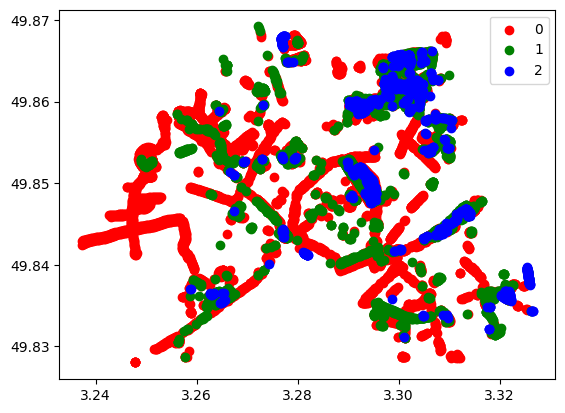

In [4]:
# Graphique des clusters
df_KM, _ = kmeans(df, target, 3)
graphiqueCluster(df_KM, 3)

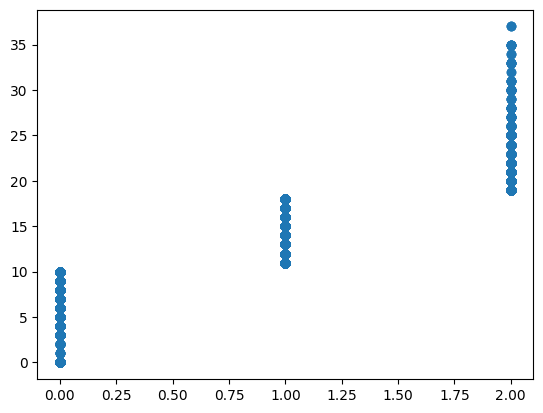

In [5]:
# visualisation pour savoir quel cluster est petit moyen grand
plt.scatter(df_KM['clusters'], df_KM['haut_tot'])
plt.show()

In [22]:
# Carte des clusters 
createMap(df_KM)

### 2 - Evaluation pour k cluster

In [36]:
df_metrique_kmeans = metrique_nclusters(df, target, kmeans)

C:\Users\Hazelya\AppData\Local\Temp\ipykernel_23960\1585592815.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Hazelya\AppData\Local\Temp\ipykernel_23960\1585592815.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Hazelya\AppData\Local\Temp\ipykernel_23960\1585592815.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
# Comparaison Silhouette 
plt.scatter(x = df_metrique_kmeans['n_clusters'], y = df_metrique_kmeans['Silhouette'], color='blue')
plt.show()
# plus c'est proche de 1 plus les clusters sont bien défini

In [ ]:
# Comparaison Davies Bouldin
plt.scatter(x = df_metrique_kmeans['n_clusters'], y = df_metrique_kmeans['Davies Bouldin'], color='green')
plt.show()
# calcul la moyenne de similarité entre les clusters (on veut un score faible)

In [ ]:
# Calinski Harabasz
plt.scatter(x = df_metrique_kmeans['n_clusters'], y = df_metrique_kmeans['Calinski Harabasz'], color='red')
plt.show()
# plus la valeur est élevé plus les groupes sont distinct

In [ ]:
df_metrique_kmeans

### 3 - Recherche du meilleur K cluster

In [4]:
def eblow(target):
    """
    Permet de determiner le meilleur n_clusters
    :param target:
    :return:
    """
    # Lien : https://www.data-transitionnumerique.com/k-means/#:~:text=La%20détection%20d%27anomalies%20%3A%20trouver,obtenir%20des%20résultats%20plus%20valables.

    tab = []
    for i in range(1, 10): # pour 1 à 10 clusters
        kmeans = KMeans(n_clusters=i, random_state=0) # on applique KMeans
        kmeans.fit(target)
        tab.append(kmeans.inertia_)

    # Affichage des résultats
    plt.plot(range(1, 10), tab)
    plt.title("La méthode Eblow")
    plt.xlabel("nombre de cluster")
    plt.ylabel("Inertie intra-classe")
    plt.show()

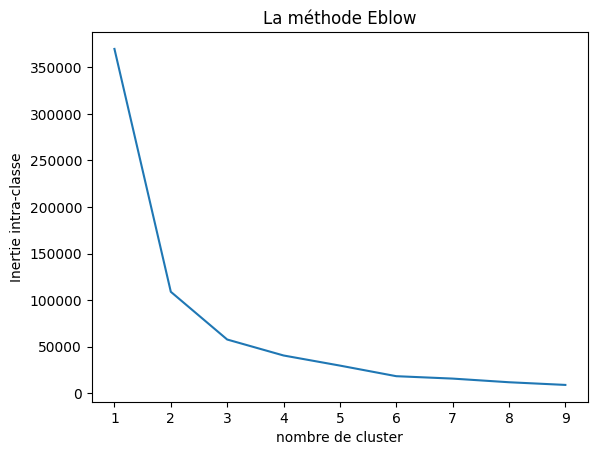

In [5]:
eblow(target)

Le coude se situe entre 2 et 3, la courbe se redresse juste après 3 clusters. On peut donc supposer que le meilleur n_cluster est 3.

## III - Spectral Clustering

### 1 - Model

In [6]:
def spectralclustering(df, target, n_clusters):
    """
    Permet de réaliser un spectral clustering
    :param df:
    :param target:
    :param n_clusters:
    :return:
    """
    # Model Spectral
    spectralModel = SpectralClustering(n_clusters=n_clusters, assign_labels='discretize', random_state=0)
    df['clusters'] = spectralModel.fit_predict(target)

    return df, spectralModel

C:\Users\Hazelya\AppData\Local\Temp\ipykernel_36236\4054015277.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = spectralModel.fit_predict(target)


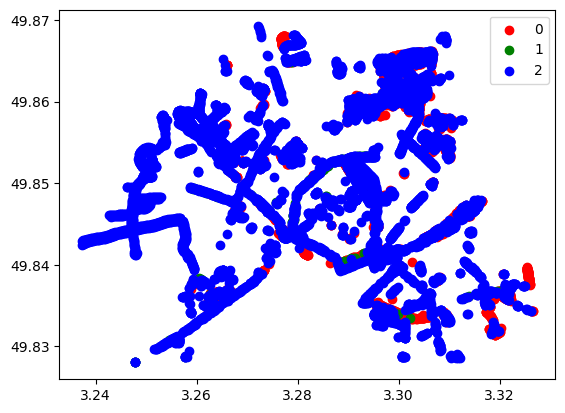

In [13]:
# Graphique des clusters
df_SC, spectralModel = spectralclustering(df, target, 3)
graphiqueCluster(df_SC, 3)

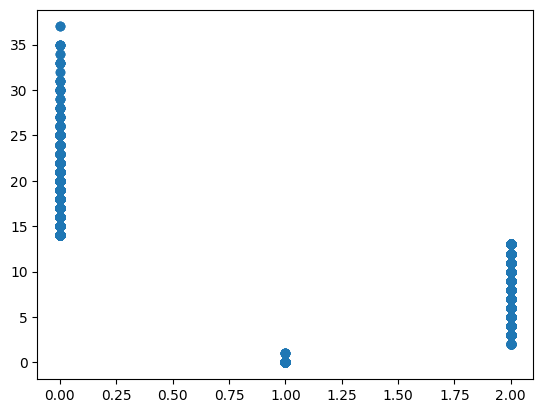

In [38]:
# visualisation pour savoir quel cluster est petit moyen grand
plt.scatter(df_SC['clusters'], df_SC['haut_tot'])
plt.show()

In [39]:
# Carte des clusters 
createMap(df_SC)

### 2 - Evaluation pour k cluster

In [7]:
df_metrique_spectral = metrique_nclusters(df, target, spectralclustering)

C:\Users\Hazelya\AppData\Local\Temp\ipykernel_36236\4054015277.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = spectralModel.fit_predict(target)
C:\Users\Hazelya\AppData\Local\Temp\ipykernel_36236\4054015277.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = spectralModel.fit_predict(target)
C:\Users\Hazelya\AppData\Local\Temp\ipykernel_36236\4054015277.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

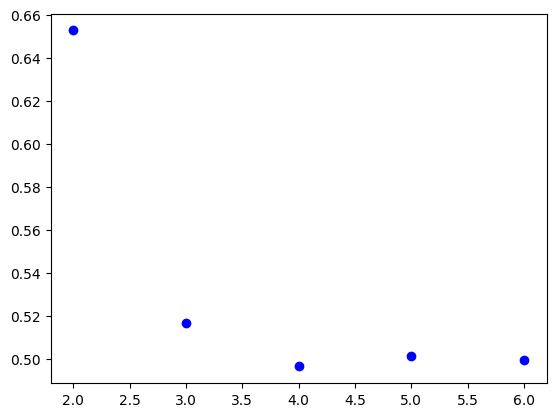

In [8]:
# Comparaison Silhouette 
plt.scatter(x=df_metrique_spectral['n_clusters'], y=df_metrique_spectral['Silhouette'], color='blue')
plt.show()
# plus c'est proche de 1 plus les clusters sont bien défini

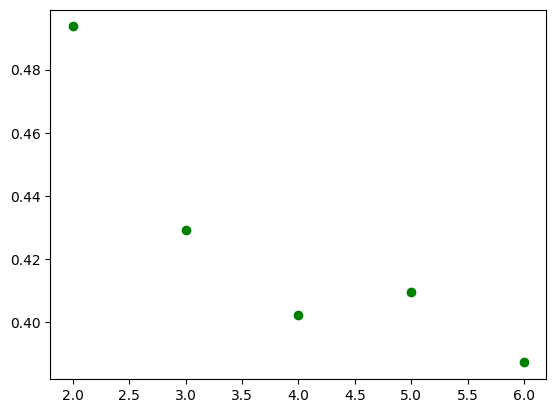

In [28]:
# Comparaison Davies Bouldin
plt.scatter(x=df_metrique_spectral['n_clusters'], y=df_metrique_spectral['Davies Bouldin'], color='green')
plt.show()
# calcul la moyenne de similarité entre les clusters (on veut un score faible)

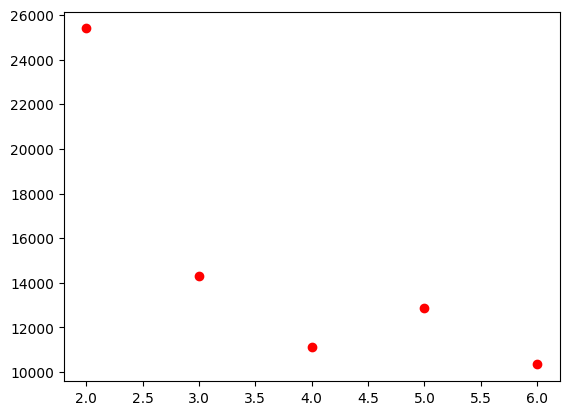

In [29]:
# Calinski Harabasz
plt.scatter(x=df_metrique_spectral['n_clusters'], y=df_metrique_spectral['Calinski Harabasz'], color='red')
plt.show()
# plus la valeur est élevé plus les groupes sont distinct

In [30]:
df_metrique_spectral

n_clusters  Silhouette  Davies Bouldin  Calinski Harabasz
1         2.0    0.652783        0.493653       25394.166368
2         3.0    0.516920        0.429133       14291.313717
3         4.0    0.496554        0.402350       11110.394340
4         5.0    0.501636        0.409688       12865.353553
5         6.0    0.499672        0.387216       10341.382123

### 3 - Recherche du meilleur k-cluster

N'ayant pas de méthode appropriée, nous pouvons fixer le meilleur k = 2 en s'appuyant sur la métrique silhouette

## IV - Agglomerative clustering

### 1 - Model

In [10]:
def agglomerativeclustering(df, target, n_clusters):
    """
    Permet de réaliser un aglomerative clustering
    :param df:
    :param target:
    :param n_clusters:
    :return:
    """
    # Model Spectral
    aggloModel = AgglomerativeClustering(n_clusters=n_clusters)
    df['clusters'] = aggloModel.fit_predict(target)

    return df, aggloModel

C:\Users\Hazelya\AppData\Local\Temp\ipykernel_36236\2416180156.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = aggloModel.fit_predict(target)


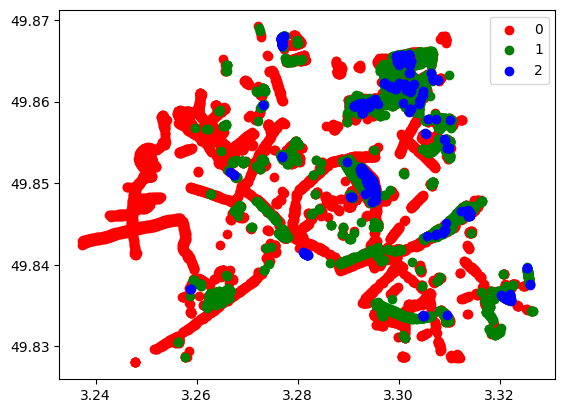

In [11]:
# Graphique des clusters
df_AC, aggloModel = agglomerativeclustering(df, target, 3)
graphiqueCluster(df_AC, 3)

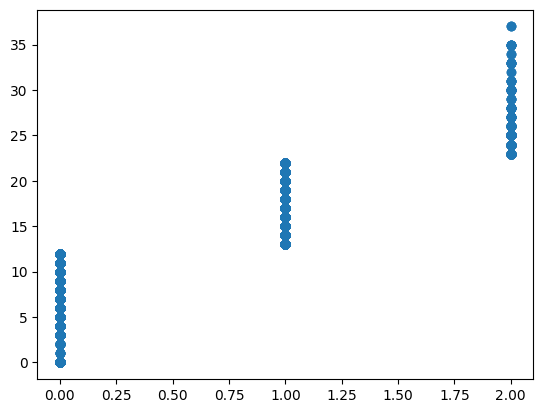

In [33]:
plt.scatter(df_AC['clusters'], df_AC['haut_tot'])
plt.show()

In [34]:
# Carte des clusters 
createMap(df_AC)

### 2 - Evaluation pour k cluster

In [41]:
df_metrique_agglo = metrique_nclusters(df, target, agglomerativeclustering)

C:\Users\Hazelya\AppData\Local\Temp\ipykernel_23960\2416180156.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Hazelya\AppData\Local\Temp\ipykernel_23960\2416180156.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Hazelya\AppData\Local\Temp\ipykernel_23960\2416180156.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

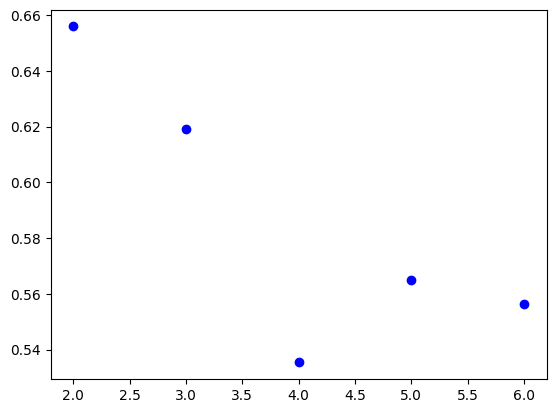

In [42]:
# Comparaison Silhouette 
plt.scatter(x=df_metrique_agglo['n_clusters'], y=df_metrique_agglo['Silhouette'], color='blue')
plt.show()
# plus c'est proche de 1 plus les clusters sont bien défini

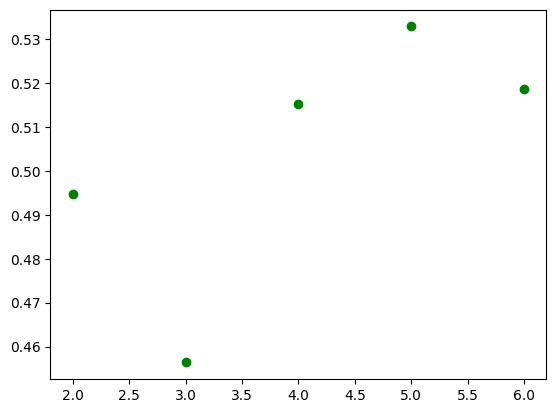

In [43]:
# Comparaison Davies Bouldin
plt.scatter(x=df_metrique_agglo['n_clusters'], y=df_metrique_agglo['Davies Bouldin'], color='green')
plt.show()
# calcul la moyenne de similarité entre les clusters (on veut un score faible)

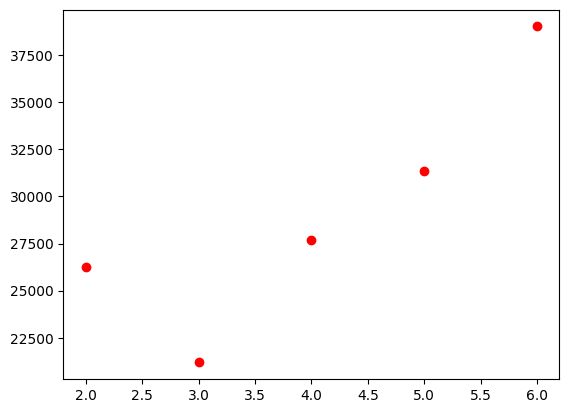

In [44]:
# Calinski Harabasz
plt.scatter(x=df_metrique_agglo['n_clusters'], y=df_metrique_agglo['Calinski Harabasz'], color='red')
plt.show()
# plus la valeur est élevé plus les groupes sont distinct

In [45]:
df_metrique_agglo

n_clusters  Silhouette  Davies Bouldin  Calinski Harabasz
1         2.0    0.655913        0.494722       26264.353546
2         3.0    0.618961        0.456381       21189.011253
3         4.0    0.535373        0.515198       27686.877551
4         5.0    0.564978        0.532848       31350.818260
5         6.0    0.556520        0.518592       39022.456189

### 3 - Recherche du meilleur K cluster

Lien : https://medium.com/@sametgirgin/hierarchical-clustering-model-in-5-steps-with-python-6c45087d4318

In [9]:
from plotly.figure_factory._dendrogram import sch

In [12]:
dendrogram = sch.dendrogram(sch.linkage(target, method='ward'))
plt.title('Dendrogram') 
plt.xlabel('Arbres') 
plt.ylabel('Distances euclidiennes') 
plt.show()

NameError: name 'sch' is not defined

Nous recherchons la plus grande distance possible verticalement sans traverser aucune ligne horizontale :
Le meilleur k cluster est donc k = 2

##  V - Comparaison des différents models

Préparation des model pour 3 et 2 clusters

In [47]:
# Les models avec 3 clusters
df_KM_3 , kmeansModel_3 = kmeans(df, target, 3)
df_SC_3 , spectralModel_3 = spectralclustering(df, target, 3)
df_AC_3 , aggloModel_3 = agglomerativeclustering(df, target, 3)

In [48]:
# Les models avec 2 clusters
df_KM_2 , kmeansModel_2 = kmeans(df, target, 2)
df_SC_2 , spectralModel_2 = spectralclustering(df, target, 2)
df_AC_2 , aggloModel_2 = agglomerativeclustering(df, target, 2)

### 1 - Organisation clusters

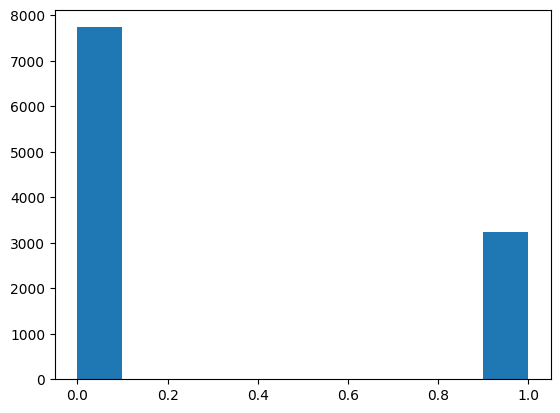

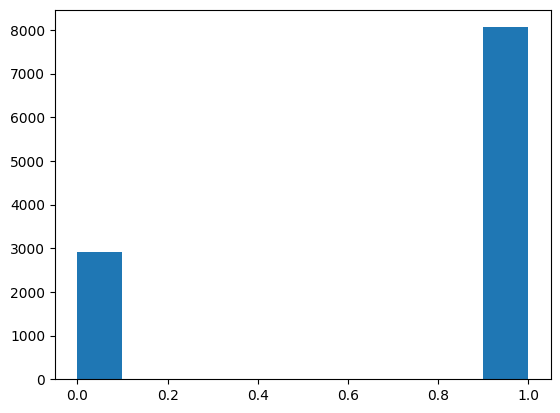

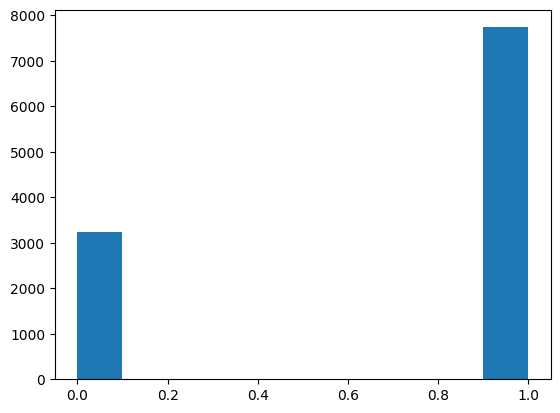

In [49]:
# Histogramme du nombre de points par cluster
plt.hist(kmeansModel_2.labels_)
plt.show()

plt.hist(spectralModel_2.labels_)
plt.show()

plt.hist(aggloModel_2.labels_)
plt.show()

### 2 - Comparaison des metriques pour k = 3

In [50]:
# Réalisation des métriques
df_metrique_comparaison = pd.DataFrame(columns=['model', 'Silhouette', 'Davies Bouldin', 'Calinski Harabasz'])

tab_MK = metriqueOneModel(target, kmeansModel_3)
df_metrique_comparaison.loc[1] = ["KMeans", tab_MK[0], tab_MK[1], tab_MK[2]]  # contient sous forme de data frame les metriques

tab_SC = metriqueOneModel(target, spectralModel_3)
df_metrique_comparaison.loc[2] = ["Spectral", tab_SC[0], tab_SC[1], tab_SC[2]]

tab_AC = metriqueOneModel(target, aggloModel_3)
df_metrique_comparaison.loc[3] = ["Agglomerative", tab_AC[0], tab_AC[1], tab_AC[2]]


In [51]:
df_metrique_comparaison

model  Silhouette  Davies Bouldin  Calinski Harabasz
1         KMeans    0.630958        0.505674       29654.040731
2       Spectral    0.516920        0.429133       14291.313717
3  Agglomerative    0.618961        0.456381       21189.011253

### 3 - Comparaison des métriques pour k = 2

In [52]:
# Réalisation des métriques
df_metrique_comparaison = pd.DataFrame(columns=['model', 'Silhouette', 'Davies Bouldin', 'Calinski Harabasz'])

tab_MK = metriqueOneModel(target, kmeansModel_2)
df_metrique_comparaison.loc[1] = ["KMeans", tab_MK[0], tab_MK[1], tab_MK[2]]  # contient sous forme de data frame les metriques

tab_SC = metriqueOneModel(target, spectralModel_2)
df_metrique_comparaison.loc[2] = ["Spectral", tab_SC[0], tab_SC[1], tab_SC[2]]

tab_AC = metriqueOneModel(target, aggloModel_2)
df_metrique_comparaison.loc[3] = ["Agglomerative", tab_AC[0], tab_AC[1], tab_AC[2]]

In [53]:
df_metrique_comparaison

model  Silhouette  Davies Bouldin  Calinski Harabasz
1         KMeans    0.655913        0.494722       26264.353546
2       Spectral    0.652783        0.493653       25394.166368
3  Agglomerative    0.655913        0.494722       26264.353546

### 4 - Comparaison du temps

In [54]:
debut_kmeans = time()
df_KM , kmeansModel = kmeans(df, target, 2)
fin_kmeans = time()
temps_kmeans = fin_kmeans - debut_kmeans

debut_spectral = time()
df_SC , spectralModel = spectralclustering(df, target, 2)
fin_spectral = time()
temps_spectral = fin_spectral - debut_spectral

debut_agglo = time()
df_AC , aggloModel = agglomerativeclustering(df, target, 2)
fin_agglo = time()
temps_agglo = fin_agglo - debut_agglo

print("temps Kmeans = ", temps_kmeans)
print("temps Spectral = ", temps_spectral)
print("temps Agglomérative = ", temps_agglo)

temps Kmeans =  0.006000995635986328
temps Spectral =  22.914345741271973
temps Agglomérative =  1.0679914951324463


## VI - Détection des anomalies 

Lien 1 : https://mrmint.fr/outliers-machine-learning
Lien 2 : https://france.devoteam.com/paroles-dexperts/algorithme-n3-comprendre-lisolation-forest-en-5-min/#:~:text=L%27isolation%20forest%20(moins%20connu,de%20l%27ensemble%20des%20données.

### 1 - Préparation variables et model

In [55]:
new_df = data[['x', 'y', 'haut_tot', 'tronc_diam']]
new_df, kmeansModel = kmeans(new_df, target, 3)

### 2 - Anomalies en fonction du diamètre du tronc

In [56]:
df_ano_diam = new_df.copy()

# On calcul les quantile
Q1 = new_df['tronc_diam'].quantile(0.25)
Q3 = new_df['tronc_diam'].quantile(0.75)
ecart = Q3 - Q1

# Définir les limites pour les anomalies
inferieur = Q1 - 1.5 * ecart
superieur = Q3 + 1.5 * ecart

In [57]:
# Identifier les anomalies
anomalies = df_ano_diam[(df_ano_diam['tronc_diam'] < inferieur) | (df_ano_diam['tronc_diam'] > superieur)].copy()
anomalies

x          y  haut_tot  tronc_diam  clusters
221    3.294333  49.849817        24         260         2
226    3.293592  49.850660        25         260         2
232    3.294492  49.849794        25         300         2
237    3.294279  49.850134        27         260         2
239    3.294550  49.849948        26         380         2
...         ...        ...       ...         ...       ...
7313   3.287213  49.856556        12         337         1
7334   3.271750  49.861317        13         300         1
8923   3.261867  49.856508        11         405         1
9173   3.267809  49.852844        17         275         1
10776  3.302653  49.840324        15         350         1

[116 rows x 5 columns]

In [62]:
for i in range(len(df_ano_diam)):
    if df_ano_diam.loc[i, 'x'] in anomalies['x'].values and df_ano_diam.loc[i, 'y'] in anomalies['y'].values:
        df_ano_diam.loc[i, 'clusters'] = "anomalie"
    if df_ano_diam.loc[i, 'clusters'] == 0:
        df_ano_diam.loc[i, 'clusters'] = "Petit"
    if df_ano_diam.loc[i, 'clusters'] == 1:
        df_ano_diam.loc[i, 'clusters'] = "Moyen"
    if df_ano_diam.loc[i, 'clusters'] == 2:
        df_ano_diam.loc[i, 'clusters'] = "Grand"

In [63]:
createMap(df_ano_diam)

### 3 - Anomalies IsolationForest

In [64]:
X_anomalies = data[['age_estim', 'tronc_diam', 'haut_tronc']]
anomalies = pd.DataFrame(columns=['anomalie'])

isolationModel = IsolationForest(contamination=0.02)
anomalies['anomalie'] = isolationModel.fit_predict(X_anomalies)
anomalies

anomalie
0             1
1             1
2             1
3             1
4             1
...         ...
10973         1
10974         1
10975         1
10976         1
10977         1

[10978 rows x 1 columns]

In [65]:
df_ano_iso = new_df.copy()  # Crée une copie de df et l'assigne à df_ano_iso

compt = 0
df_ano_iso['affichage'] = None  # Ajoute une colonne 'affichage' remplie de valeurs nulles à df_ano_iso
for i in range(len(df_ano_iso)):
    if i < len(anomalies) and anomalies.loc[i, "anomalie"] == -1:
        df_ano_iso.loc[i, 'affichage'] = "anomalie"
        compt += 1
    elif df_ano_iso.loc[i, 'clusters'] == 0:
        df_ano_iso.loc[i, 'affichage'] = "Petit"
    elif df_ano_iso.loc[i, 'clusters'] == 1:
        df_ano_iso.loc[i, 'affichage'] = "Moyen"
    elif df_ano_iso.loc[i, 'clusters'] == 2:
        df_ano_iso.loc[i, 'affichage'] = "Grand"

In [66]:
print("nombre anomalies : ", compt)

nombre anomalies :  220


In [67]:
createMap(df_ano_iso, 'affichage')